# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)


In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [6]:
#if os.path.isfile("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5728855.csv"):
    #filepath = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5728855.csv"
    #print("loading from file")
#else:
    #filepath = "C:\\Users\\Davy\\1161\\data_project\\API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5728855.csv"
    #print("loading from the internet")

filepath = "C:\\Users\\Davy\\1161\\data_project\\API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv"
phr_data = pd.read_csv(filepath)
print("done")

filepath = "C:\\Users\\Davy\\1161\\data_project\\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5728786.csv"
gpc_data = pd.read_csv(filepath)
print("done")

filepath = "C:\\Users\\Davy\\1161\\data_project\\API_NY.ADJ.NNTY.PC.CD_DS2_en_csv_v2_5730096.csv"
ipc_data = pd.read_csv(filepath)
print("done")


done
done
done


In [7]:
phr_data.head()


,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.5,NaN,0.5,NaN,0.5,NaN,NaN
2,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.3,4.5,3.7,3.3,3.9,4.7,5.3,5.3,5.4,1.9
3,Canada,NaN,2.2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.2,0.2,0.5,0.2,0.2,0.2,0.2,0.2,NaN,NaN
4,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.2,8.5,2.9,2.1,1.2,0.8,0.7,0.4,0.1,NaN


In [8]:
gpc_data.head()

,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,3304.837820,3495.141628,3949.461643,4770.714415,6482.831082,7003.842471,7486.684973,7775.577645,8252.652035,...,62598.686620,68047.378180,68156.386100,62515.314830,56708.961200,49876.712380,53934.154370,57206.990670,54941.065720,51722.069000
2,Brazil,439.220916,494.802750,577.451537,806.354513,1034.164430,1188.619532,1376.347928,1547.694206,1716.707728,...,13200.558170,12327.515560,12258.564850,12071.404650,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197
3,Canada,4135.821498,4535.346032,5106.737080,5858.391831,7056.582022,7536.821932,8838.693384,8949.109893,9154.760931,...,52223.696110,52669.089960,52635.174960,50955.998320,43596.135540,42315.603710,45129.429300,46547.795180,46374.152750,43349.677860
4,China,113.162582,118.654149,131.885532,157.089148,160.147681,178.339577,165.404233,185.420499,156.396389,...,5614.385739,6300.582352,7020.385682,7636.074223,8016.446016,8094.390375,8817.045496,9905.406118,10143.860210,10408.719120


In [9]:
ipc_data.head()

,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,2679.49,2828.03,3247.87,3942.54,5330.87,5785.31,6190.98,6364.68,6724.80,...,48255.55,53382.55,53834.81,48664.39,44267.58,39055.24,42000.89,43990.14,42364.65,40200.58
2,Brazil,393.73,448.47,520.10,678.47,874.52,996.84,1200.04,1357.37,1498.49,...,11156.21,10454.61,10581.81,10371.61,7619.19,7530.48,8547.18,7737.67,7565.58,5783.81
3,Canada,3429.76,3774.18,4278.77,4861.05,5705.51,6139.20,7226.17,7253.14,7399.26,...,42619.40,43099.95,43061.31,41719.05,35274.02,34330.33,36956.08,37633.86,37802.58,35052.95
4,China,103.52,108.59,120.16,143.01,141.61,154.73,140.97,157.64,132.38,...,4163.08,4799.85,5273.57,5799.90,6039.92,6145.89,6714.79,7378.39,7545.86,7572.28


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [141]:
phr_data.sample(5)


,Country_Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,0.9,1.1,0.8,0.9,1.1,0.7,0.8,0.8,0.9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.1,NaN,...,22.5,NaN,NaN,NaN,18.7,18.1,13.4,11.1,10.0,NaN
4,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.2,8.5,2.9,2.1,1.2,0.8,0.7,0.4,0.1,NaN
8,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,1.2,1.4,1.2,1.9,1.6,1.4,1.5,1.0,0.8


We can also get the list of columns out of the data frame

In [15]:
phr_data.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

In [153]:
gpc_data.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [152]:
ipc_data.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [155]:
row_one = ipc_data.iloc[1]
row_one



1970     2679.49
1971     2828.03
1972     3247.87
1973     3942.54
1974     5330.87
1975     5785.31
1976     6190.98
1977     6364.68
1978     6724.80
1979     7419.53
1980     8153.29
1981     9679.80
1982    10202.55
1983     9340.03
1984    10007.03
1985     9080.79
1986     9037.91
1987     9243.30
1988    11459.88
1989    14162.46
1990    14148.36
1991    14656.26
1992    14499.03
1993    14000.60
1994    14484.96
1995    16059.93
1996    17400.97
1997    18712.41
1998    17065.71
1999    16449.47
2000    17175.41
2001    15553.12
2002    16174.81
2003    18961.21
2004    24585.76
2005    26825.37
2006    28198.93
2007    31285.89
2008    37709.12
2009    33354.11
2010    40208.70
2011    48255.55
2012    53382.55
2013    53834.81
2014    48664.39
2015    44267.58
2016    39055.24
2017    42000.89
2018    43990.14
2019    42364.65
2020    40200.58
Name: Australia, dtype: float64

Series objects are _very_ similar to dictionaries. They have more properties though.

In [12]:
row_one["Country_Name"]

NameError: name 'row_one' is not defined

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [13]:
row_one.Country_Name

NameError: name 'row_one' is not defined

Doing the same thing on a dataframe gives us the whole column

In [148]:
ipc_data.set_index("Country_Name",inplace=True)
ipc_data['1993']

Country_Name
NaN                        NaN
Australia             14000.60
Brazil                 2012.46
Canada                16106.06
China                   328.21
France                18936.47
Germany               21217.57
India                   262.71
Italy                 15689.81
Japan                 28255.37
Russian Federation     1566.95
South Africa           2864.42
Spain                 11566.10
United Kingdom        16163.44
United States         21808.81
World                  3822.88
Name: 1993, dtype: float64

In [150]:
gpc_data.set_index("Country_Name",inplace=True)
gpc_data['1993']

Country_Name
NaN                            NaN
Australia             17700.115560
Brazil                 2766.328477
Canada                20186.988500
China                   377.389839
France                22380.331900
Germany               25522.629570
India                   301.500786
Italy                 18738.763900
Japan                 35681.968490
Russian Federation     2930.670166
South Africa           3461.334353
Spain                 13339.908560
United Kingdom        18390.217820
United States         26387.293730
World                  4662.166250
Name: 1993, dtype: float64

In [14]:
phr_data.set_index("Country_Name",inplace=True)
phr_data['1993']


Country_Name
NaN                    NaN
Australia              NaN
Brazil                22.1
Canada                 NaN
China                 62.7
France                 NaN
Germany                0.0
India                 47.6
Italy                  1.2
Japan                  NaN
Russian Federation     NaN
South Africa          33.5
Spain                  NaN
United Kingdom         0.2
United States          0.5
World                 35.7
Name: 1993, dtype: float64

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Years'>

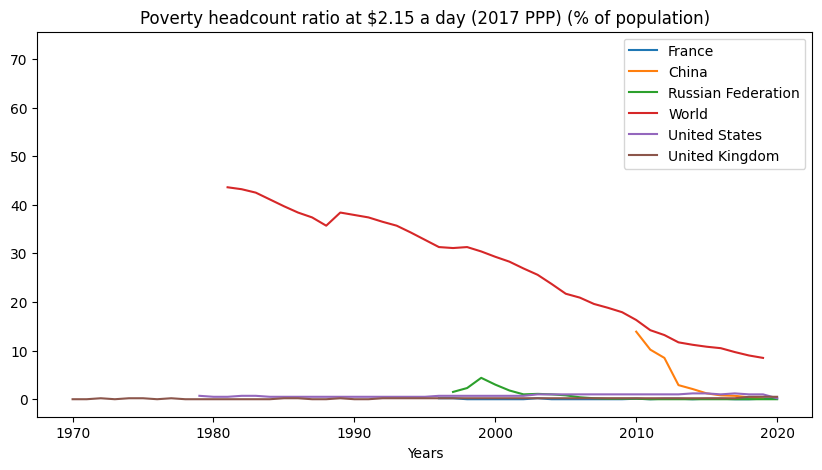

In [158]:
# gdp_data[["Years","GDP_per_capita_current_USD"]].plot(legend=True)
row_5 = phr_data.iloc[5]
row_5.plot(legend = True)
row_4 = phr_data.iloc[4]
row_4.plot(legend = True)
row_10 = phr_data.iloc[10]
row_10.plot(legend = True)
row_15 = phr_data.iloc[15]
row_15.plot(legend = True)
row_14 = phr_data.iloc[14]
row_14.plot(legend = True)
row_13 = phr_data.iloc[13]
row_13.plot(title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", xlabel="Years", legend = True)

<Axes: title={'center': 'GDP per capita (current US$)'}, xlabel='Years'>

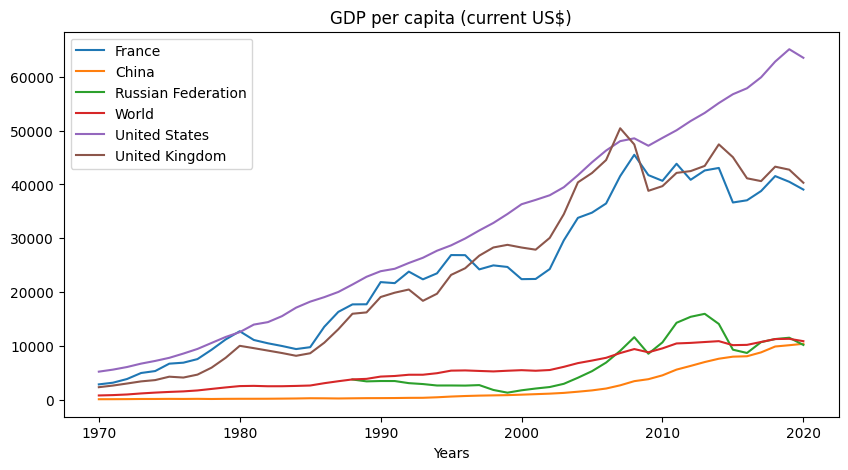

In [160]:
row_5 = gpc_data.iloc[5]
row_5.plot(legend = True)
row_4 = gpc_data.iloc[4]
row_4.plot(legend = True)
row_10 = gpc_data.iloc[10]
row_10.plot(legend = True)
row_15 = gpc_data.iloc[15]
row_15.plot(legend = True)
row_14 = gpc_data.iloc[14]
row_14.plot(legend = True)
row_13 = gpc_data.iloc[13]
row_13.plot(title="GDP per capita (current US$)", xlabel="Years", legend = True)

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Years'>

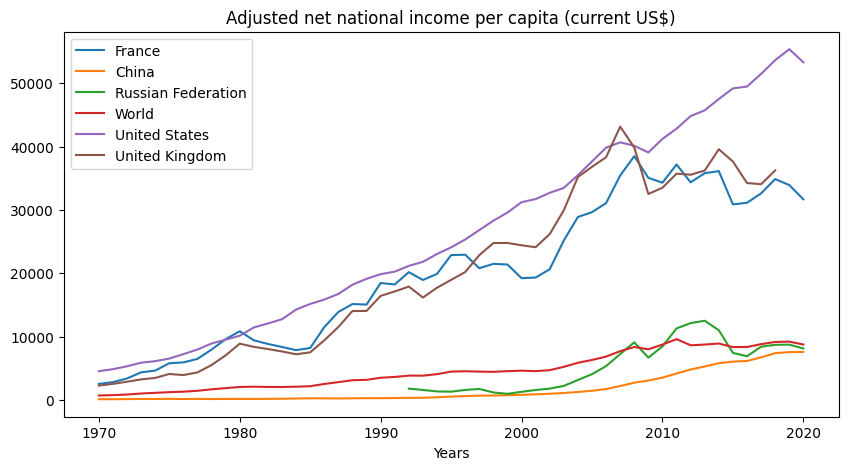

In [161]:
row_5 = ipc_data.iloc[5]
row_5.plot(legend = True)
row_4 = ipc_data.iloc[4]
row_4.plot(legend = True)
row_10 = ipc_data.iloc[10]
row_10.plot(legend = True)
row_15 = ipc_data.iloc[15]
row_15.plot(legend = True)
row_14 = ipc_data.iloc[14]
row_14.plot(legend = True)
row_13 = ipc_data.iloc[13]
row_13.plot(title="Adjusted net national income per capita (current US$)", xlabel="Years", legend = True)

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Country_Name'>

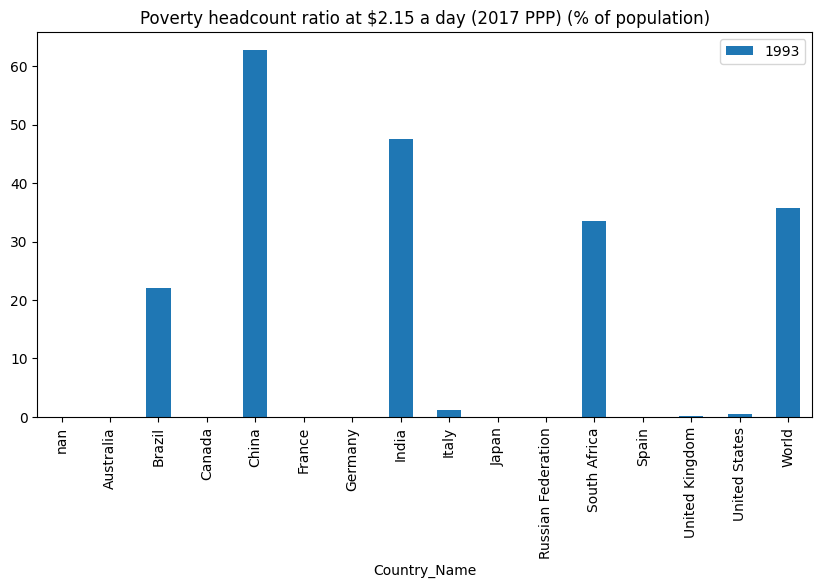

In [170]:
phr_data['1993'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

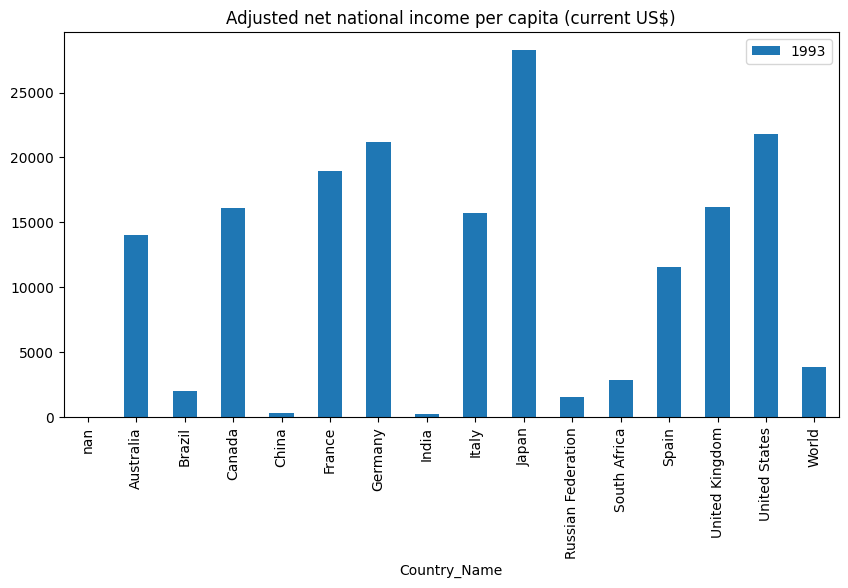

In [175]:
ipc_data['1993'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", legend = True)

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Country_Name'>

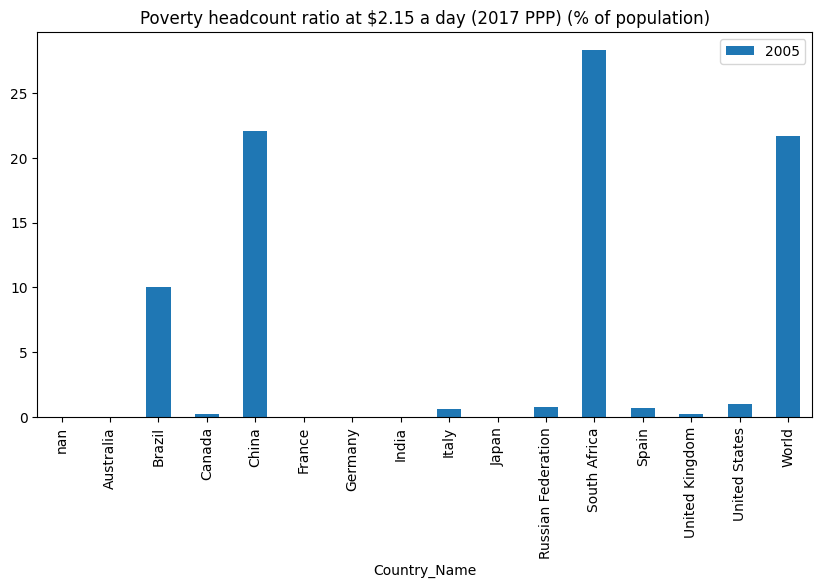

In [171]:
phr_data['2005'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

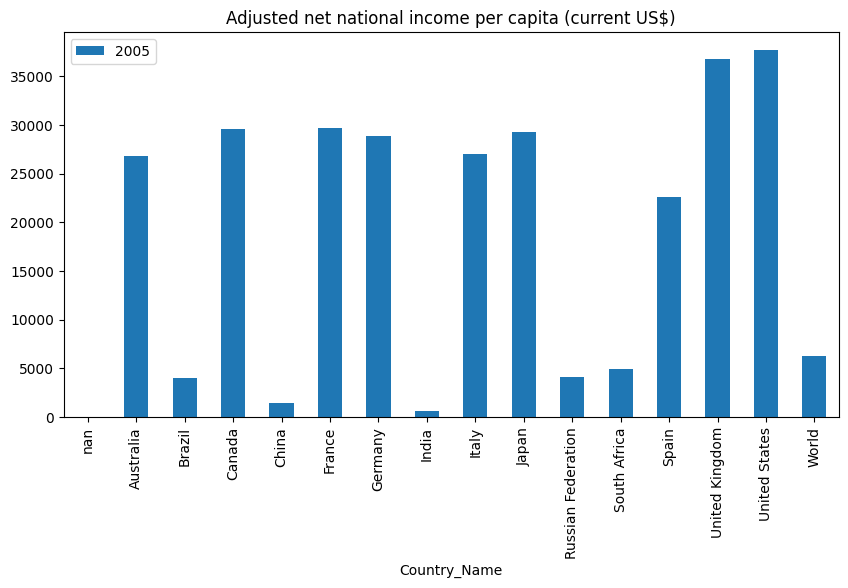

In [176]:
ipc_data['2005'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", legend = True)

<Axes: title={'center': 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'}, xlabel='Country_Name'>

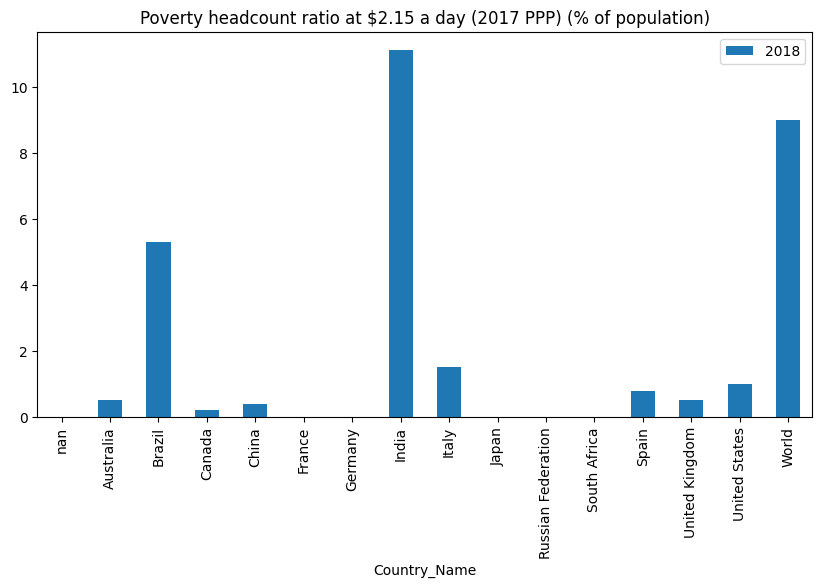

In [169]:
phr_data['2018'].plot(kind="bar", title="Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", legend = True)

<Axes: title={'center': 'Adjusted net national income per capita (current US$)'}, xlabel='Country_Name'>

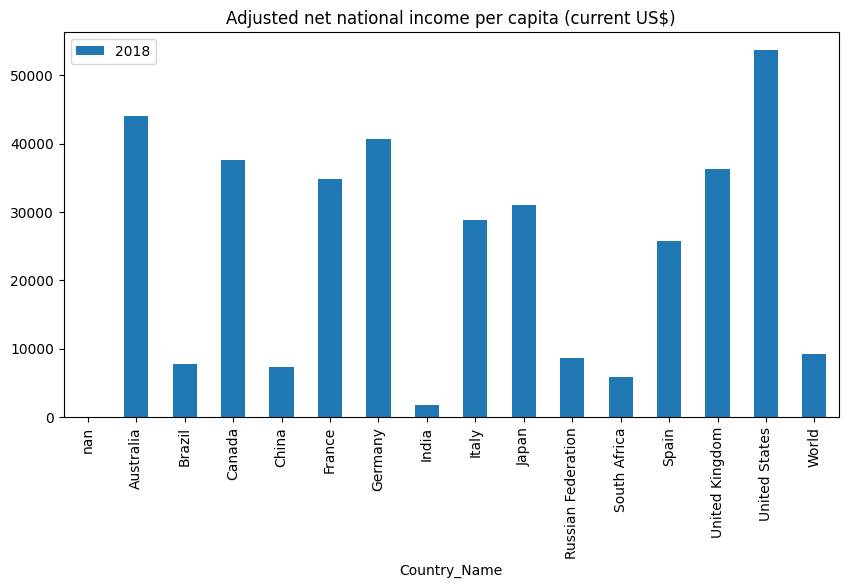

In [177]:
ipc_data['2018'].plot(kind="bar", title="Adjusted net national income per capita (current US$)", legend = True)

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

In [35]:
phr_data.GDP_per_capita_current_USD[phr_data.GDP_per_capita_current_USD < 3000].hist()


AttributeError: 'DataFrame' object has no attribute 'GDP_per_capita_current_USD'

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT\xa0AND\xa0LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All fines under $3000')

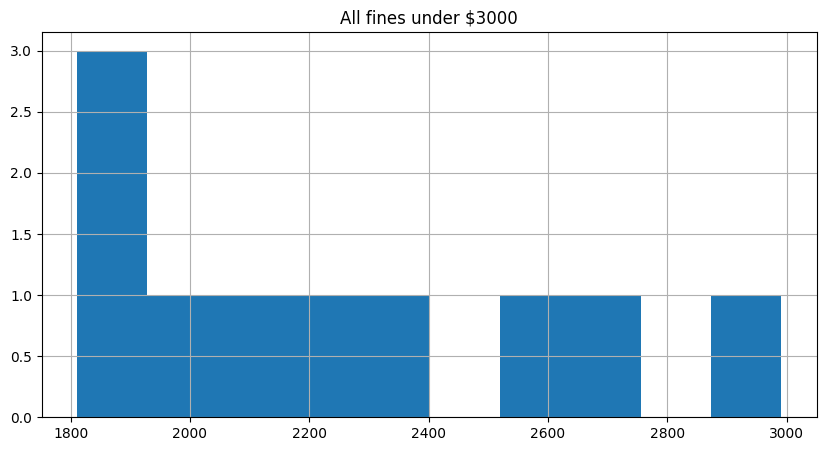

In [ ]:
upper_bound = 3000
gdp_data.GDP_per_capita_current_USD[gdp_data.GDP_per_capita_current_USD < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'All fines under $1000')

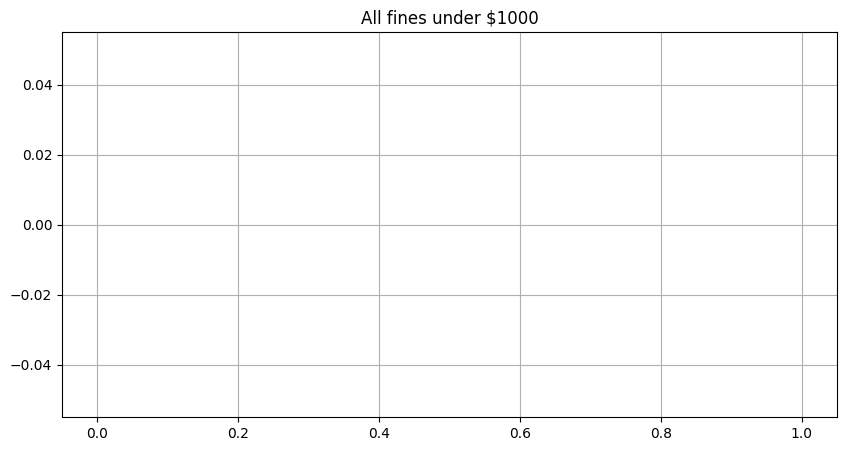

In [ ]:
upper_bound = 1000
gdp_data.GDP_per_capita_current_USD[gdp_data.GDP_per_capita_current_USD < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
gdp_data.head(2)

,GDP_per_capita_current_USD
Years,
1960,1810.597443
1961,1877.600224


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
gdp_data.GDP_per_capita_current_USD.value_counts()

GDP_per_capita_current_USD
1810.597443     1
41023.754860    1
18129.790720    1
20446.719850    1
22020.079800    1
               ..
11391.436710    1
11650.841870    1
14284.429200    1
17834.447850    1
64491.429890    1
Name: count, Length: 63, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='GDP_per_capita_current_USD'>

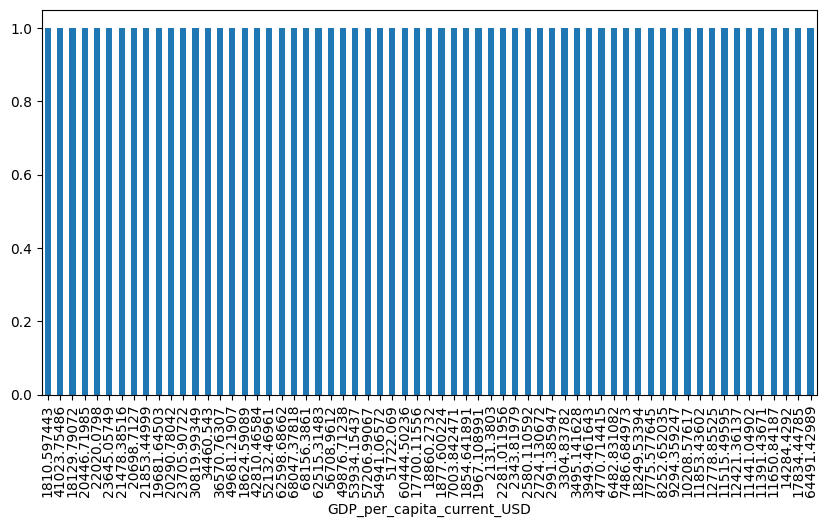

In [ ]:
pdvc = gdp_data.GDP_per_capita_current_USD.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

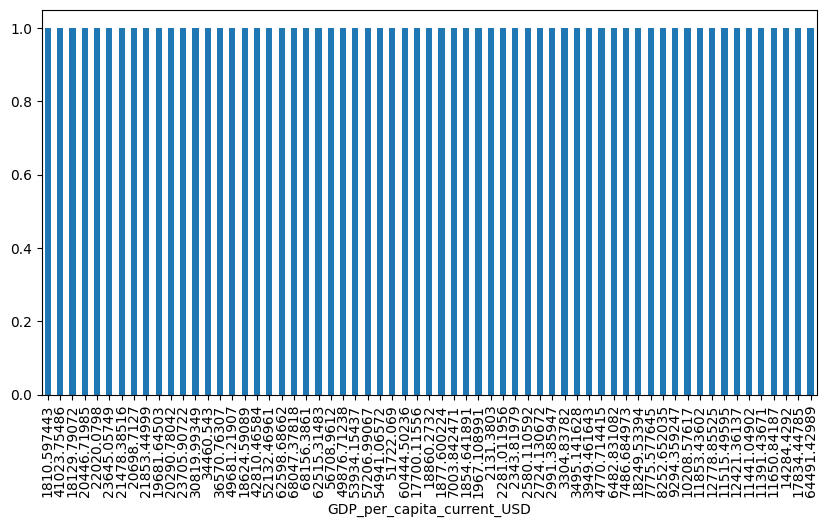

In [ ]:
pdvc = gdp_data.GDP_per_capita_current_USD.value_counts() 
pdvc[pdvc < 10000].plot(kind="bar");

This pattern keeps repeating itself:

<Axes: xlabel='GDP_per_capita_current_USD'>

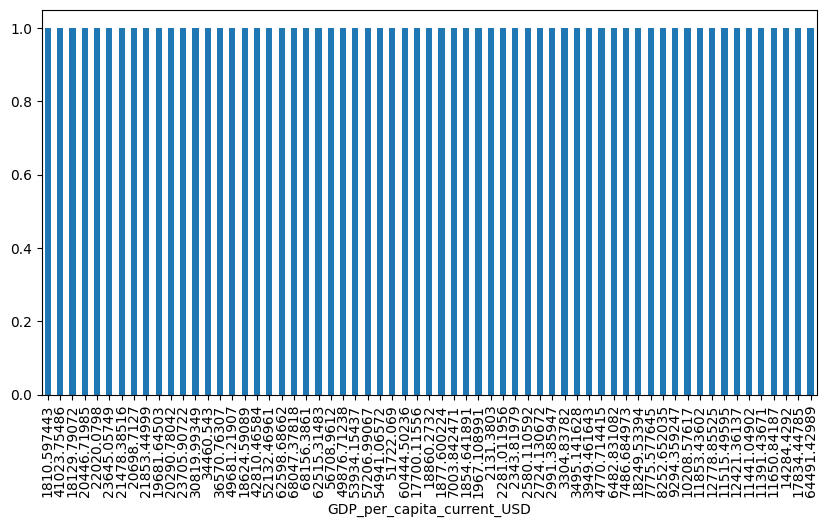

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

<Axes: xlabel='GDP_per_capita_current_USD'>

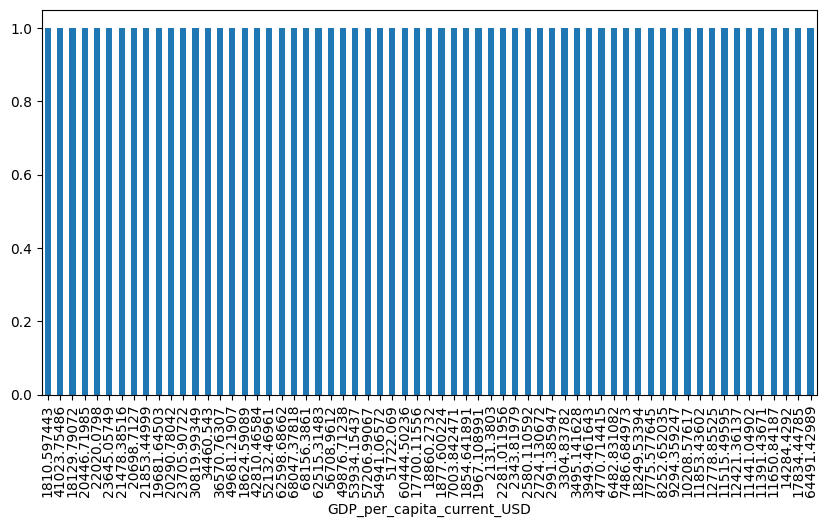

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='GDP_per_capita_current_USD'>

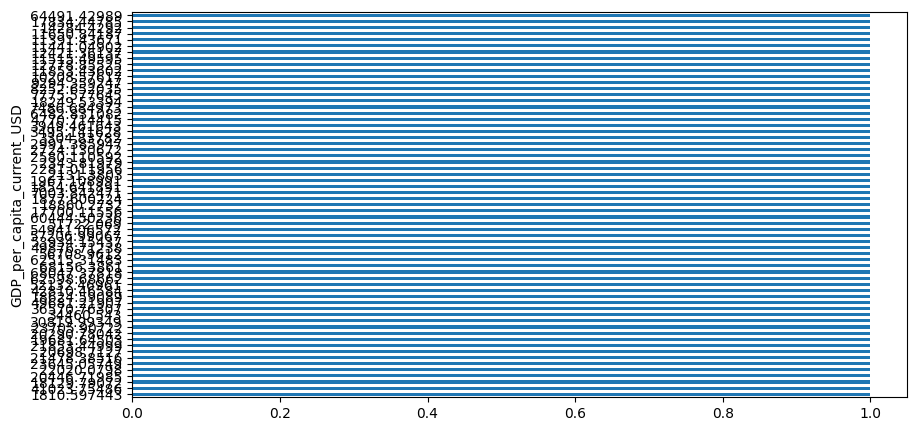

In [ ]:
pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


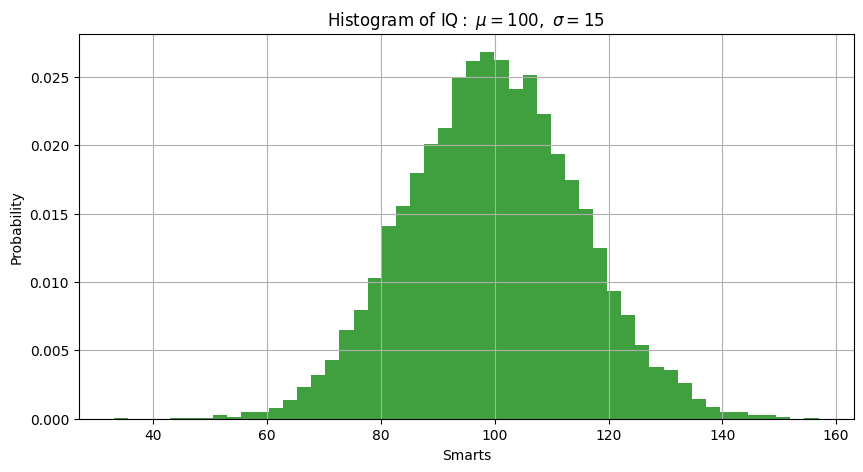

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

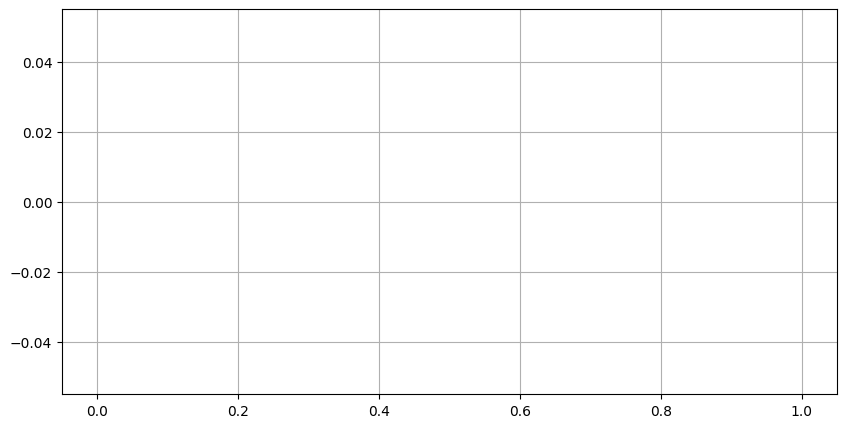

In [ ]:
gdp_data.GDP_per_capita_current_USD[gdp_data.GDP_per_capita_current_USD < 1000].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

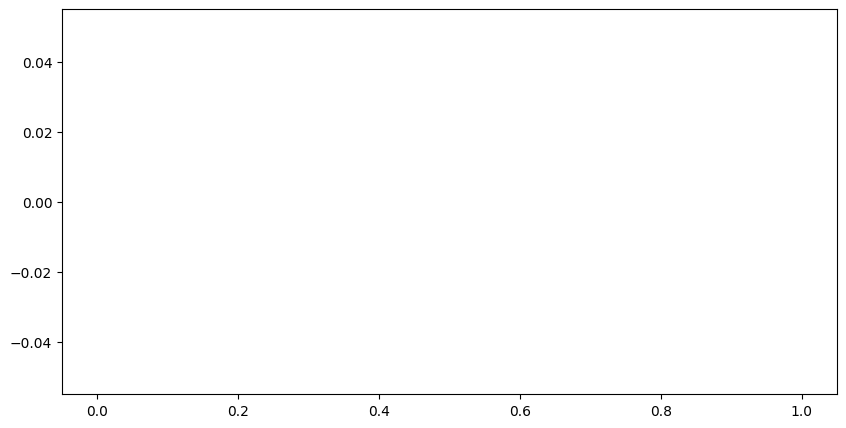

In [ ]:
capped_face_value_data = gdp_data.GDP_per_capita_current_USD[gdp_data.GDP_per_capita_current_USD < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

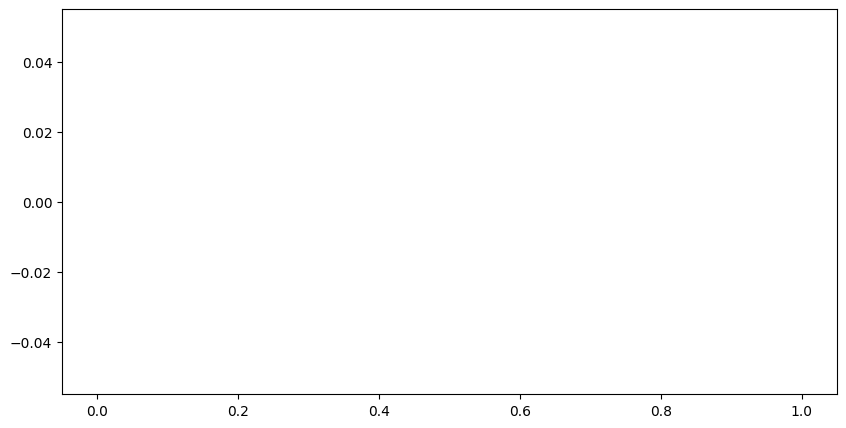

In [ ]:
capped_face_value_data = gdp_data.GDP_per_capita_current_USD[gdp_data.GDP_per_capita_current_USD < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

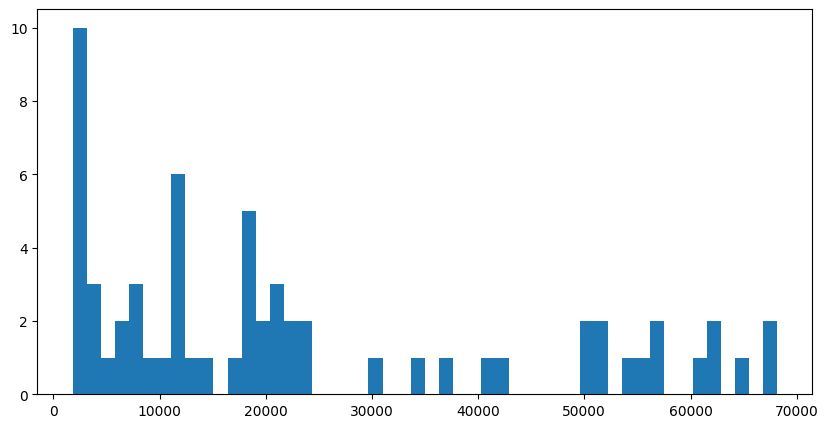

In [ ]:
plt.hist(gdp_data.GDP_per_capita_current_USD, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

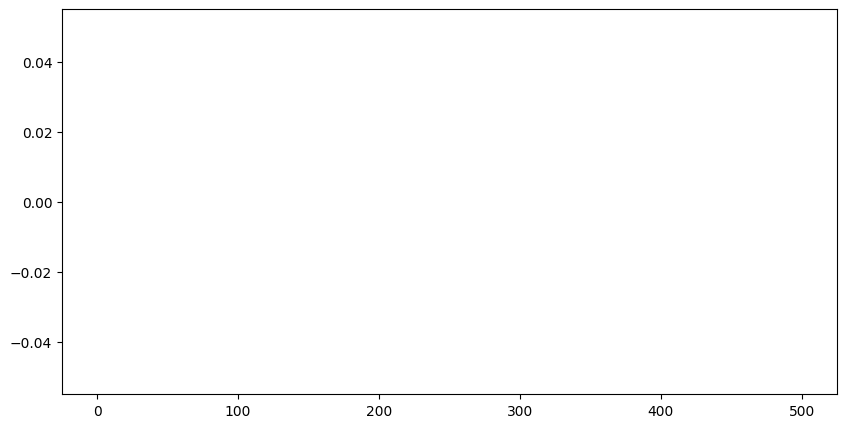

In [ ]:
plt.hist(gdp_data["GDP_per_capita_current_USD"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

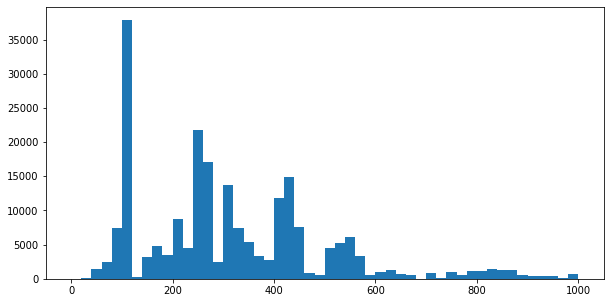

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.FACE_VALUE,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

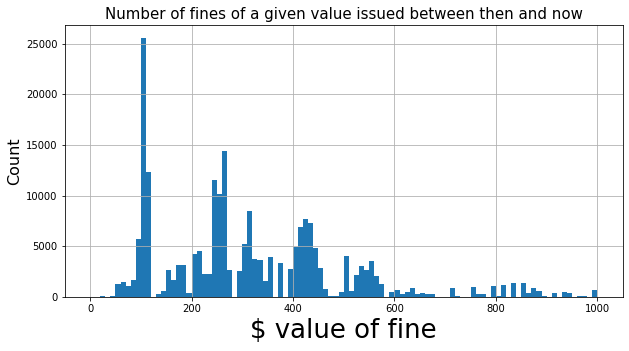

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.FACE_VALUE, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

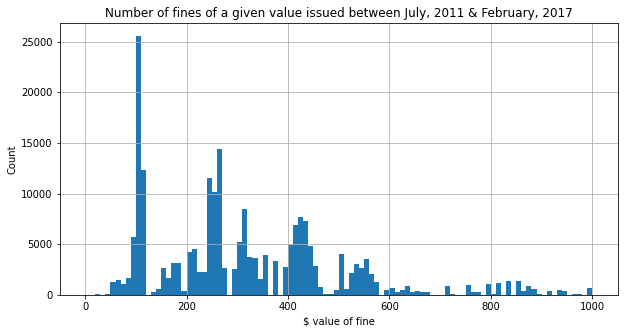

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

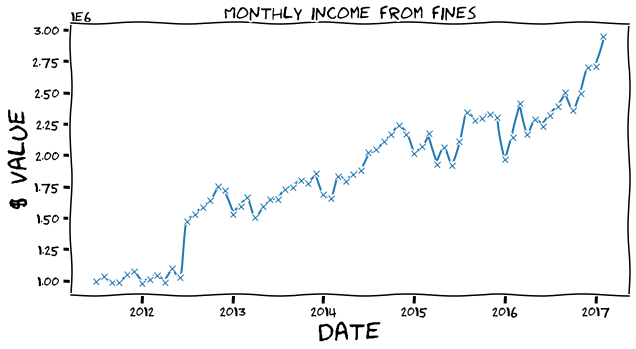

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,46,16238,1,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

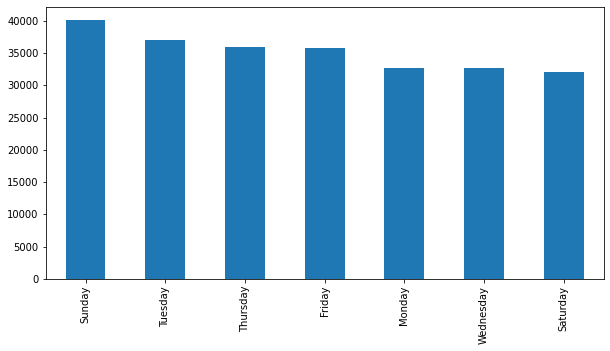

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_